### Tool

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

np.set_printoptions(precision = 2)

### Load the data set

In [2]:
# Excel 파일 불러오기

df_train = pd.read_excel('C:/Users/dwkim/data/1553768847-housing.xlsx', sheet_name = 0)

df_train.head()

,total_rooms,total_bedrooms,households,median_income,median_house_value
0,880,129.0,126,8.3252,452600
1,7099,1106.0,1138,8.3014,358500
2,1467,190.0,177,7.2574,352100
3,1274,235.0,219,5.6431,341300
4,1627,280.0,259,3.8462,342200


In [3]:
X_train = df_train.loc[:,'total_rooms':'median_income'].to_numpy().astype(int)
y_train = df_train['median_house_value'].to_numpy()

X_features = list(df_train.columns[:4])

### Scale/normalize the training data

In [4]:
Scaler = StandardScaler()
X_norm = Scaler.fit_transform(X_train)
print(f"Peak to peak range by column in Raw \t X:{np.ptp(X_train, axis=0)}")
print(f"Peak to peak range by column in Normalized X:{np.ptp(X_norm, axis=0)}")


Peak to peak range by column in Raw 	 X:[      39318 -2147477203        6081          15]
Peak to peak range by column in Normalized X:[18.02 10.04 15.91  7.76]


### Create and fit the regression model

In [5]:
sgdr = SGDRegressor(max_iter = 200000)
sgdr.fit(X_norm,y_train)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

number of iterations completed: 11, number of weight updates: 227041.0


### View parameters

In [6]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_

print(f"model parameters:\t {w_norm}, b:{b_norm}")

model parameters:	 [-47748.88     95.08  49742.93  85883.13], b:[206146.69]


### Make predictions

In [7]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)

# make a predcition using w,b
y_pred = np.dot(X_norm, w_norm) + b_norm

print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[400764.68 396315.76 350102.8  270892.74]
Target values 
[452600 358500 352100 341300]


### Plot result

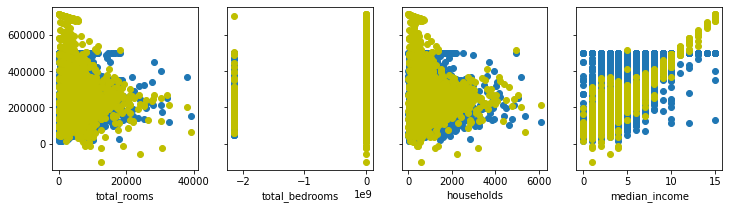

In [8]:
fig, ax = plt.subplots(1, 4, figsize = (12,3), sharey = True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i], y_pred, color = 'y', label = 'predict')



### Regression 모델 성능 평가

평가 방법
* MSE(Mean Sqaured Error) : 실제값과 예측값의 차이를 제곱하여 평균한 수치
* RMSE(Root Mean Squared Error) : MSE에 루트(제곱근)을 씌운 수치. 실제 오류 평균보다 더 커지는 특성이 있으므로 이를 방지해준다.
* R2 Score(결정계수) : 분산 기반으로 예측 성능을 평가한다. 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높다. 

In [9]:
# 성능 평가

mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_train, y_pred)

print(f"MSE score: {mse}")
print(f"RMSE scroe : {rmse}")
print(f"결정 계수 : {r2_score}") 

MSE score: 6867990844.668815
RMSE scroe : 82873.34218353218
결정 계수 : 0.4842109348593996
